# Time Series Analysis in Python
       
<img src="img/profile_manoelgadi.png" width=100 height=100 align="right">

Author: Prof. Manoel Gadi

Contact: mfalonso@faculty.ie.edu

Teaching Web: http://mfalonso.pythonanywhere.com

Last revision: 17/June/2022
    
        

Time series forecasting is __fundamental for various use cases in different domains such as energy
systems and economics__. Creating a forecasting model for a specific use case requires an iterative and
complex design process. The typical design process includes the five sections:
* (1) data pre-processing,
* (2) feature engineering,
* (3) hyperparameter optimization,
* (4) forecasting method selection, and
* (5) forecast ensembling



## What is the time series
A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Time series are used in statistics, signal processing, pattern recognition, econometrics, mathematical finance, weather forecasting, earthquake prediction, electroencephalography, control engineering, astronomy, communications engineering, and largely in any domain of applied science and engineering which involves temporal measurements. [1]

<img src="img/forecasting_pipeline.png" >

<img src="https://miro.medium.com/max/1400/0*bCS3EWiVfLIZqwIW.gif">

## Let's start with the basics - The Components of a Time Series

Time series has four components. Any time series can contain some or all of the following components: [2]
- Trend (T)
-  Seasonal (S)
-  Cyclical (C)
- Irregular - Random (I)

These components may be combined in different ways. It is usually assumed that they are multiplied or
added, i.e.

yt = T × C × S × I
yt = T + C + S + I

**Trend Component:**  The trend is the long term pattern of a time series. A trend can be positive or negative depending on whether
the time series exhibits an increasing long term pattern or a decreasing long term pattern. If a time series does not show an increasing or decreasing pattern then the series is stationary in the mean.

**Cyclical component:** Any pattern showing an up and down movement around a given trend is identified as a cyclical pattern. The duration of a cycle depends on the type of business or industry being analyzed.

**Seasonal component:** Seasonality occurs when the time series exhibits regular fluctuations during the same month (or months) every year, or during the same quarter every year. For instance, retail sales peak during the month of December.

**Irregular component:**  This component is unpredictable. Every time series has some unpredictable component that makes it a random variable. In prediction, the objective is to “model” all the components to the point that the only component that remains unexplained is the random component.


## The Box-Jenkins Methodology. ARIMA Models

The Box-Jenkins Model forecasts data using three principles: autoregression, differencing, and
moving average. Each principle is used in the Box-Jenkins analysis; together, they are collectively
shown as ARIMA (p, d, q). The methodology allows the model to identify trends using
autoregresssion, moving averages, and seasonal differencing to generate forecasts.

This analysis will be explained and applied to different uses like forecasting a variety of anticipated
data points or data ranges, including business data and future security prices


## 4.7 - MA models: an approximation to the ARMA models

### 4.7.1 Auto Regression (AR) MODELS - Long Memory Models

AR is a stationary model, it forecast the past values of the series based solely on the past values of the series (lags).

In a Auto Regression 1, AR(1), the forecast is calculated based on the previous day target (also known as lagged target).

In a Auto Regression 1, AR(p), the forecast is calculated based on the p days ago target.

<img src="img/AR1.png" width=500 height=500>

#### VIDEO:
AR Models:https://www.youtube.com/watch?v=Mc6sBAUdDP4

In [10]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manoelgadi/Peppermoney/refs/heads/main/datasets/AAPL_2006-01-01_to_2018-01-01.csv")[["Date","Close"]]
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")

df_monthly = df.set_index("Date").resample("M")["Close"].mean().reset_index()
df_monthly = df_monthly.set_index("Date").asfreq('M').reset_index()
df_monthly = df_monthly.set_index("Date")
df_monthly.index.freq = "M"

C:\Users\manoe\AppData\Local\Temp\ipykernel_23228\4108828735.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index("Date").resample("M")["Close"].mean().reset_index()
C:\Users\manoe\AppData\Local\Temp\ipykernel_23228\4108828735.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_monthly.set_index("Date").asfreq('M').reset_index()
C:\Users\manoe\AppData\Local\Temp\ipykernel_23228\4108828735.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly.index.freq = "M"


In [11]:
train = df_monthly[:-40]
test = df_monthly[-40:]
start = len(train)
end = start + len(test) - 1

In [12]:
from statsmodels.tsa.ar_model import AutoReg #
model_ar = AutoReg(train["Close"], lags=1)
model_ar_fit1 = model_ar.fit()
prediction_ar1 = model_ar_fit1.predict(start, end).rename("AR(1) Model")


model_ar = AutoReg(train["Close"], lags=2)
model_ar_fit2 = model_ar.fit()
prediction_ar2 = model_ar_fit2.predict(start, end).rename("AR(2) Model")

model_ar = AutoReg(train["Close"], lags=3)
model_ar_fit3 = model_ar.fit()
prediction_ar3 = model_ar_fit3.predict(start, end).rename("AR(3) Model")

model_ar = AutoReg(train["Close"], lags=4)
model_ar_fit4 = model_ar.fit()
prediction_ar4 = model_ar_fit4.predict(start, end).rename("AR(4) Model")

In [13]:
from sklearn.metrics import mean_squared_error
labels = ["AR-1","AR-2", "AR-3", "AR-4"]
preds = [prediction_ar1,prediction_ar2,prediction_ar3,prediction_ar4]

for i in range(4):
    error = mean_squared_error(test["Close"], preds[i])
    print(f'{labels[i]} MSE -> {error}')

AR-1 MSE -> 271.8136876964665
AR-2 MSE -> 482.42592760567123
AR-3 MSE -> 371.4364149506611
AR-4 MSE -> 350.057003153153


<Axes: xlabel='Date'>

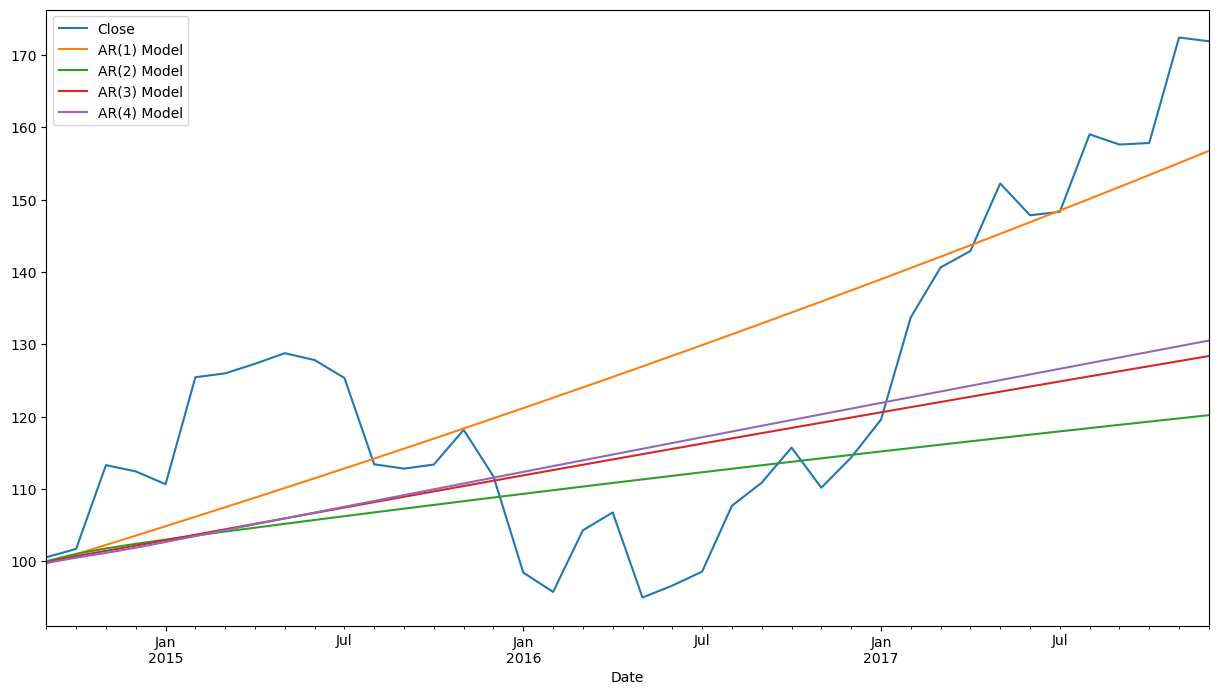

In [14]:
test.Close.plot(figsize = (15,8), legend = True)
prediction_ar1.plot(legend = True)
prediction_ar2.plot(legend = True)
prediction_ar3.plot(legend = True)
prediction_ar4.plot(legend = True)

In [15]:
model_ar_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Close   No. Observations:                  104
Model:                     AutoReg(1)   Log Likelihood                -271.102
Method:               Conditional MLE   S.D. of innovations              3.364
Date:                Thu, 26 Jun 2025   AIC                            548.203
Time:                        12:04:13   BIC                            556.107
Sample:                    02-28-2006   HQIC                           551.405
                         - 08-31-2014                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5461      0.613      0.892      0.373      -0.654       1.747
Close.L1       1.0073      0.012     81.221      0.000       0.983       1.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9928           +0.0000j            0.9928            0.0000
-----------------------------------------------------------------------------
"""

---
# But, was I right using a AR model?

## Checks for Stationarity

* __Look at Plots__: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
* __Summary Statistics__: You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
* __Statistical Tests__: You can use statistical tests to check if the expectations of stationarity are met or have been violated.

ref: https://machinelearningmastery.com/time-series-data-stationary-python/


## Augmented Dickey-Fuller unit root test.
# documentation: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

* __Null Hypothesis (H0)__: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* __Alternate Hypothesis (H1)__: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


In [17]:
from statsmodels.tsa.stattools import adfuller
X = train["Close"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('series is stationary') if result[1] < 0.05 else print('series is non-stationary')


ADF Statistic: -0.281589
p-value: 0.928072
series is non-stationary


## What about the mortgages data?

In [19]:
data = pd.read_csv('https://raw.githubusercontent.com/manoelgadi/Peppermoney/refs/heads/main/datasets/mortgages.csv', sep = ';')
data = data.sort_values(by = ['fch'])

In [20]:
data

fch   valor
221  2003M01  118040
220  2003M02  119166
219  2003M03  116565
218  2003M04  104744
217  2003M05  116615
..       ...     ...
4    2021M02   42601
3    2021M03   49686
2    2021M04   43249
1    2021M05   47417
0    2021M06   49382

[222 rows x 2 columns]

In [21]:
from statsmodels.tsa.stattools import adfuller
X = data["valor"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('series is stationary') if result[1] < 0.05 else print('series is non-stationary')

ADF Statistic: -1.558430
p-value: 0.504434
series is non-stationary


Still bad, but a little better! So we need to add more elements to our model!

### Brent Crude Oil Last Day Financ (BZ=F)

In [24]:
#!pip install pandas_datareader

In [25]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [26]:
import yfinance as yf
import datetime

# Define parameters
try:
    stock_symbol = 'BZ=F'  # Brent Crude Oil Futures
    start_date = '2024-05-01' # Use a date present in the index
    end_date   = '2025-05-30'  # Use a date present in the index
    # Download data
    df_brent = yf.download(stock_symbol, start=start_date, end=end_date, interval='1d')
    from statsmodels.tsa.stattools import adfuller
    X = df_brent["Close"]
    result = adfuller(X)
    print(df_brent.head())
except:
    df_brent = pd.read_csv("https://raw.githubusercontent.com/manoelgadi/Peppermoney/refs/heads/main/datasets/brent_oil.csv", index_col=0)
    df_brent.columns = ['Close']
    print(df_brent.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BZ=F']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


                Close
Date                 
2023-05-01  79.309998
2023-05-02  75.320000
2023-05-03  72.330002
2023-05-04  72.500000
2023-05-05  75.300003


In [27]:
from statsmodels.tsa.stattools import adfuller
X = df_brent["Close"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('series is stationary') if result[1] < 0.05 else print('series is non-stationary')

ADF Statistic: -1.841633
p-value: 0.359997
series is non-stationary


# Transformation to make your time series stationary!
ref: https://www.youtube.com/watch?v=1c_QpeLlcjg

* Differecing: today - yesterday or today/yesterday using .shift(1) or .shift(p)
* Rolling averages: today - moving average using .rolling(window = 20).mean()
* Transformation: transformation(today) using:
    * np.log() - logarithimc transformaiton
    * np.sqrt() - square root transformation
    * np.cbrt() - cube root transformation
    
After the transformation, one should __test for stationarity of the time series again__.

Note that __stationarity is necessary for ARIMA and ARIMA based models__ like the whole GARCH family, for example DCC-GARCH (Dynamic Conditional Correlation GARCH Model).

On the other hand, __stationarity is not necessary for Long short-term memory (LSTM)__ models, as LSTM is an artificial neural network model which can deal with complex trends natively.


In [29]:
from statsmodels.tsa.stattools import adfuller
X = df_brent["Close"]/df_brent["Close"].shift(1)
X = X.dropna()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('series is stationary') if result[1] < 0.05 else print('series is non-stationary')

ADF Statistic: -23.100068
p-value: 0.000000
series is stationary


### Test for autocorrelation

We will use the Durbin-Watson test for autocorrelation.  The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.


The Hypotheses for the Durbin Watson test are:
H0 = no first order autocorrelation.
H1 = first order correlation exists.
(For a first order correlation, the lag is one time unit).
Assumptions are:


The Durbin Watson test reports a test statistic, with a value from 0 to 4, where:

* 1.5 to 2.5 is no autocorrelation.
* 0 to <1.5 is positive autocorrelation (common in time series data).
* \>2.5 to 4 is negative autocorrelation (less common in time series data).

In [31]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(df_brent["Close"])

0.00031765566648402885

We OK to go as autocorrelation exists!

Autocorrelation is necessary when using univariate time series forecasting, __if autocorrelation does not exist__ we need to __introduce exogenous variables__ and perform multivariate time series analysis. Although some techiniques have been generalised to be multivariate, without doubt, __LSTM and related techiniques are the most frequent in this case__. We will see LSTM next VC ;-)  

In [33]:
df_brent["return"] = df_brent["Close"]/df_brent["Close"].shift(1)
df_brent = df_brent.dropna()

In [34]:
start, end

(104, 143)

In [35]:
df_brent

Close    return
Date                           
2023-05-02  75.320000  0.949691
2023-05-03  72.330002  0.960303
2023-05-04  72.500000  1.002350
2023-05-05  75.300003  1.038621
2023-05-08  77.010002  1.022709
...               ...       ...
2025-05-22  64.440002  0.992759
2025-05-23  64.779999  1.005276
2025-05-27  64.089996  0.989349
2025-05-28  64.900002  1.012639
2025-05-29  64.150002  0.988444

[523 rows x 2 columns]

### Auto Regressive Model using ARIMA from statsmodels

To create our moving average model we shall use ARIMA from statsmodels. This is a composite of an autoregressive model, AR(p), an integration model, I(d), and a moving average model, MA(q), which is passed via the tuple order(p,d,q). Here we shall use again a window of p=1:

In [37]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=df_brent['return'], order=(1, 0, 0))
results = ARMA_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  523
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1359.024
Date:                Thu, 26 Jun 2025   AIC                          -2712.048
Time:                        12:04:24   BIC                          -2699.269
Sample:                             0   HQIC                         -2707.043
                                - 523                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9998      0.001   1227.230      0.000       0.998       1.001
ar.L1         -0.0058      0.039     -0.149      0.881      -0.082       0.071
sigma2         0.0003   1.69e-05     19.127      0.0

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [38]:
results

In [39]:
df_brent

Close    return
Date                           
2023-05-02  75.320000  0.949691
2023-05-03  72.330002  0.960303
2023-05-04  72.500000  1.002350
2023-05-05  75.300003  1.038621
2023-05-08  77.010002  1.022709
...               ...       ...
2025-05-22  64.440002  0.992759
2025-05-23  64.779999  1.005276
2025-05-27  64.089996  0.989349
2025-05-28  64.900002  1.012639
2025-05-29  64.150002  0.988444

[523 rows x 2 columns]

In [40]:
start_date = '2025-01-02' # Use a date present in the index
end_date   = '2025-05-29'  # Use a date present in the index
df_brent['forecast_ar1'] = results.predict(start=start_date, end=end_date)


In [41]:
df_brent[['return','forecast_ar1']].tail(100)

return  forecast_ar1
Date                              
2025-01-06  0.997255      0.999709
2025-01-07  1.009830      0.999770
2025-01-08  0.988449      0.999696
2025-01-09  1.009979      0.999821
2025-01-10  1.036922      0.999695
...              ...           ...
2025-05-22  0.992759      0.999795
2025-05-23  1.005276      0.999796
2025-05-27  0.989349      0.999723
2025-05-28  1.012639      0.999816
2025-05-29  0.988444      0.999680

[100 rows x 2 columns]

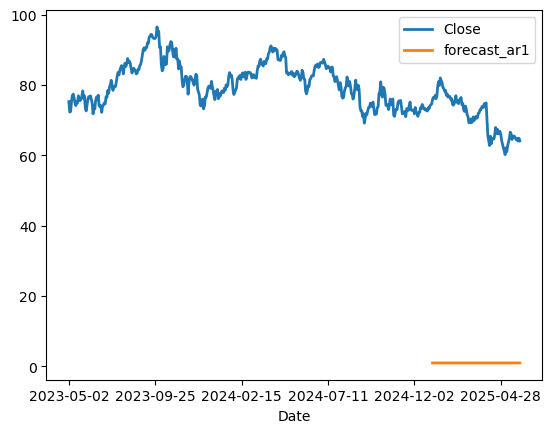

In [42]:
df_brent[['Close','forecast_ar1']].plot(lw=2);



In [43]:
#from sklearn.metrics import mean_squared_error
#error_ar1 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ar1'].tail(100))
#print(f'AR(1) MSE -> {error_ar1}')


Moving Average (MA) Models  - Short Memory Models

In a Moving Average 1, MA(1), the forecast is calculated based on the error of the previous day.

In a Moving Average q, MA(q), the forecast is calculated based on the moving average errors of the __q__ previous day.


#### VIDEO:
MA Models - https://www.youtube.com/watch?v=zNLG8tsA_Go

__Rolling average__

We shall now create a rolling average, with a window size of 10, using pandas.DataFrame.rolling


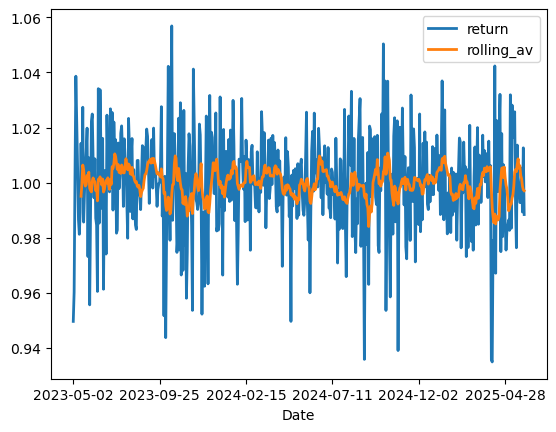

In [46]:
df_brent['rolling_av'] = df_brent['return'].rolling(10).mean()
# take a look
df_brent[['return','rolling_av']].plot(lw=2);



In [47]:
from sklearn.metrics import mean_squared_error
error_ar1 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ar1'].tail(100))
print(f'AR(1) MSE -> {error_ar1}')
error_rolling_av = mean_squared_error(df_brent['return'].tail(100),df_brent['rolling_av'].tail(100))
print(f'rolling(10) moving average MSE -> {error_rolling_av}')


AR(1) MSE -> 0.0003283027067586455
rolling(10) moving average MSE -> 0.0003200859732305737


### Moving average model

To create our moving average model we shall use ARIMA from statsmodels. This is a composite of an autoregressive model, AR(p
), an integration model, I(d), and a moving average model, MA(q), which is passed via the tuple order(p,d,q). Here we shall use again a window of q=10:

In [49]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=df_brent['return'], order=(0, 0, 10))
results = ARMA_model.fit()
print(results.summary())

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  523
Model:                ARIMA(0, 0, 10)   Log Likelihood                1365.803
Date:                Thu, 26 Jun 2025   AIC                          -2707.606
Time:                        12:04:29   BIC                          -2656.492
Sample:                             0   HQIC                         -2687.588
                                - 523                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9998      0.001   1831.322      0.000       0.999       1.001
ma.L1         -0.0170      0.040     -0.421      0.674      -0.096       0.062
ma.L2          0.0162      0.042      0.390      0.6

D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
df_brent

Close    return  forecast_ar1  rolling_av
Date                                                     
2023-05-02  75.320000  0.949691           NaN         NaN
2023-05-03  72.330002  0.960303           NaN         NaN
2023-05-04  72.500000  1.002350           NaN         NaN
2023-05-05  75.300003  1.038621           NaN         NaN
2023-05-08  77.010002  1.022709           NaN         NaN
...               ...       ...           ...         ...
2025-05-22  64.440002  0.992759      0.999795    1.002621
2025-05-23  64.779999  1.005276      0.999796    1.001446
2025-05-27  64.089996  0.989349      0.999723    0.998738
2025-05-28  64.900002  1.012639      0.999816    0.997431
2025-05-29  64.150002  0.988444      0.999680    0.997086

[523 rows x 4 columns]

### Predictions

We shall now look at the predictions made by our moving average model


In [52]:
start_date = '2025-01-02' # Use a date present in the index
end_date   = '2025-05-29'  # Use a date present in the index
df_brent['forecast_ma10'] = results.predict(start=start_date, end=end_date)




In [53]:
df_brent[['return','forecast_ma10']].tail(10)



return  forecast_ma10
Date                               
2025-05-15  0.976396       0.998764
2025-05-16  1.013637       0.997923
2025-05-19  1.001987       0.995800
2025-05-20  0.997559       0.999072
2025-05-21  0.992811       0.999040
2025-05-22  0.992759       0.998898
2025-05-23  1.005276       0.996809
2025-05-27  0.989349       0.996674
2025-05-28  1.012639       1.000533
2025-05-29  0.988444       1.001843

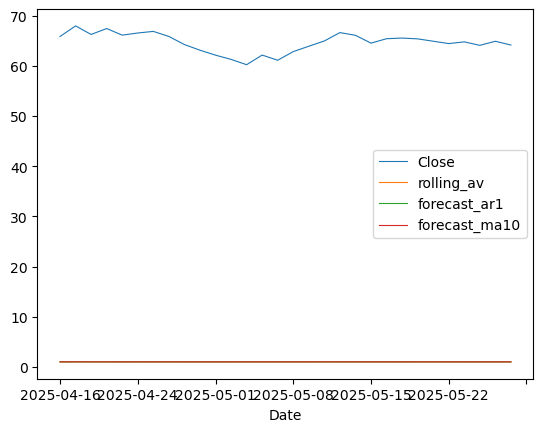

In [54]:


df_brent[['Close','rolling_av','forecast_ar1','forecast_ma10']].tail(30).plot(lw=0.8);



In [55]:
from sklearn.metrics import mean_squared_error
error_ar1 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ar1'].tail(100))
print(f'AR(1) MSE -> {error_ar1}')
error_rolling_av = mean_squared_error(df_brent['return'].tail(100),df_brent['rolling_av'].tail(100))
print(f'rolling(10) moving average MSE -> {error_rolling_av}')
error_ma10 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ma10'].tail(100))
print(f'MA(10) MSE -> {error_ma10}')



AR(1) MSE -> 0.0003283027067586455
rolling(10) moving average MSE -> 0.0003200859732305737
MA(10) MSE -> 0.00031727547594717387


In [56]:
from statsmodels.tsa.stattools import adfuller
X = df_brent["return"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -23.100068
p-value: 0.000000


# ARMA MODELS

To create our auto regressive + moving average model we shall use ARIMA from statsmodels.

This is a composite of an autoregressive model, AR(p), an integration model, I(d), and a moving average model, MA(q), which is passed via the tuple order(p,d,q).

Here we shall use again a window of p=1 and q=10.


In [59]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=df_brent['return'], order=(1, 0, 10))
results = ARMA_model.fit()
print(results.summary())

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  523
Model:                ARIMA(1, 0, 10)   Log Likelihood                1365.357
Date:                Thu, 26 Jun 2025   AIC                          -2704.714
Time:                        12:04:33   BIC                          -2649.339
Sample:                             0   HQIC                         -2683.027
                                - 523                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9998      0.001   1782.417      0.000       0.999       1.001
ar.L1         -0.7837      2.291     -0.342      0.732      -5.274       3.707
ma.L1          0.7630      2.287      0.334      0.7

In [60]:
start_date = '2025-01-02' # Use a date present in the index
end_date   = '2025-05-29'  # Use a date present in the index
df_brent['forecast_ar1ma10'] = results.predict(start=start_date, end=end_date)

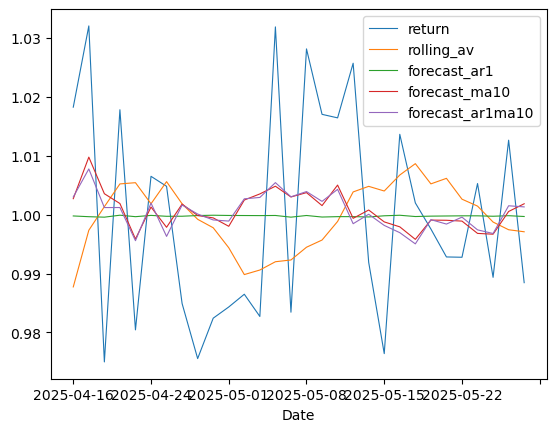

In [61]:
df_brent[['return','rolling_av','forecast_ar1','forecast_ma10','forecast_ar1ma10']].tail(30).plot(lw=0.8);


In [62]:
from sklearn.metrics import mean_squared_error
error_ar1 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ar1'].tail(100))
print(f'AR(1) MSE -> {error_ar1}')
error_rolling_av = mean_squared_error(df_brent['return'].tail(100),df_brent['rolling_av'].tail(100))
print(f'rolling(10) moving average MSE -> {error_rolling_av}')
error_ma10 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ma10'].tail(100))
print(f'MA(10) MSE -> {error_ma10}')
error_ar1ma10 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ar1ma10'].tail(100))
print(f'ARMA(1,10) MSE -> {error_ar1ma10}')

AR(1) MSE -> 0.0003283027067586455
rolling(10) moving average MSE -> 0.0003200859732305737
MA(10) MSE -> 0.00031727547594717387
ARMA(1,10) MSE -> 0.00032040769286359493


# Test for autocorrelation

We will use the Durbin-Watson test for autocorrelation.  The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.

In [64]:
durbin_watson(df_monthly.Close)

0.003516405559029118

## ACF & PACF Plotting

In [66]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt


def tsplot(y, lags=None, figsize=(12, 7), style='bmh'): # [3]
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

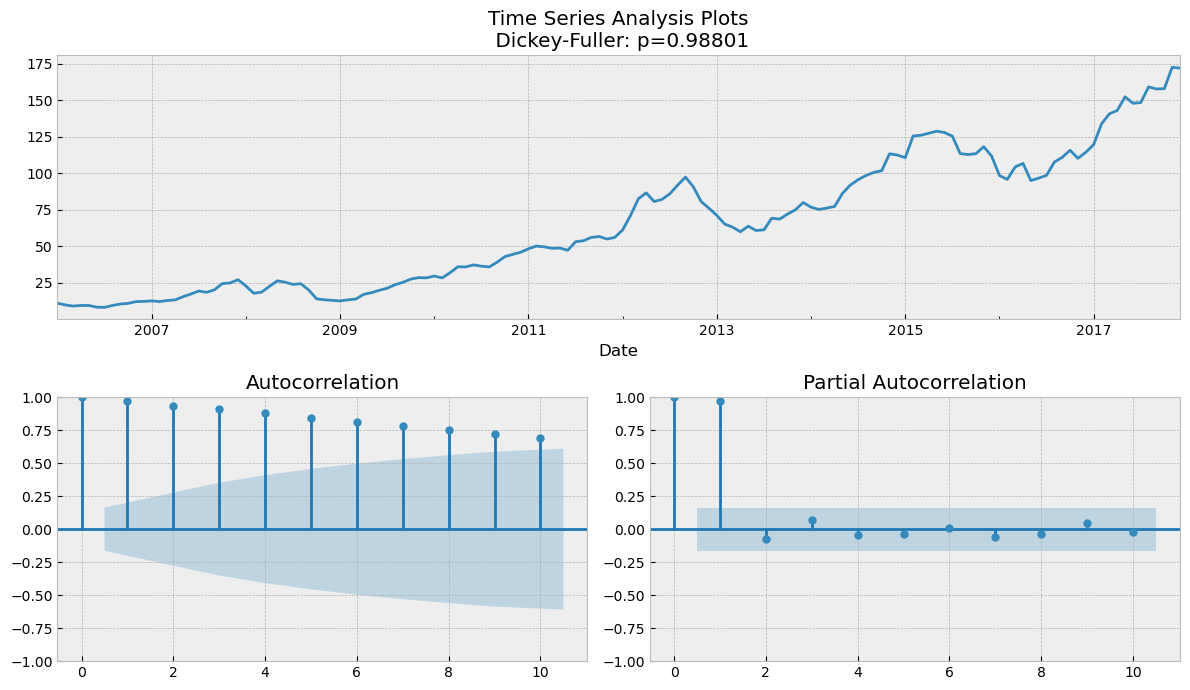

In [67]:
tsplot(df_monthly.Close, lags=10)

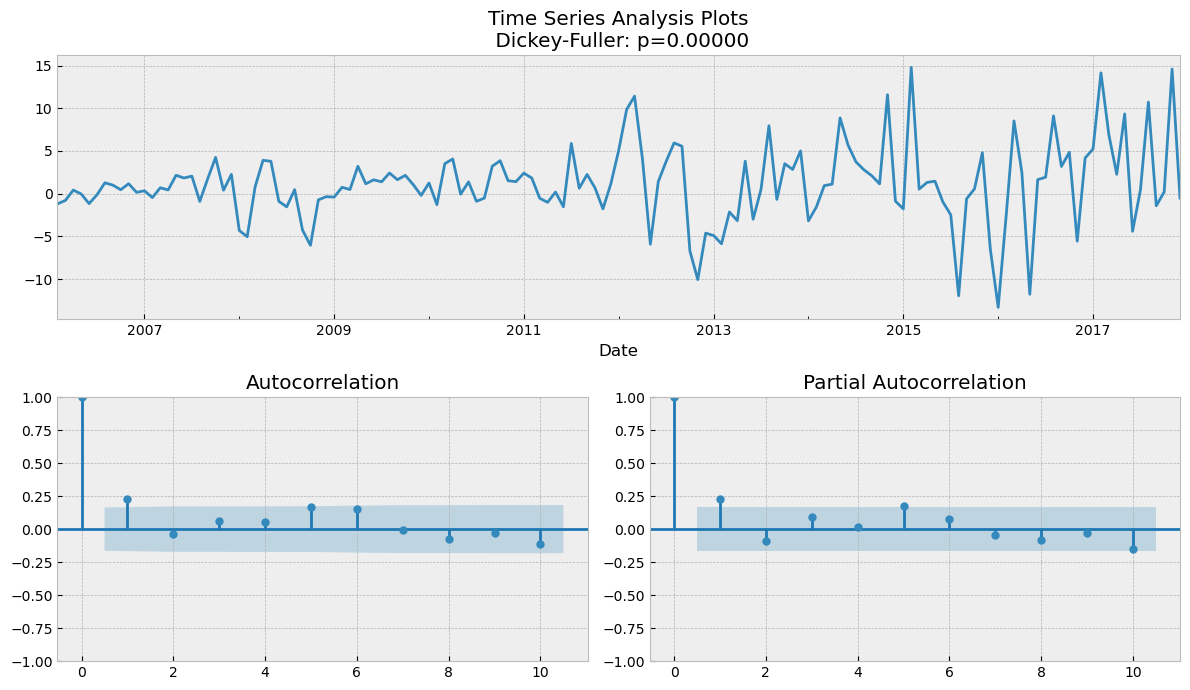

In [68]:
tsplot(df_monthly.Close.diff(1).dropna(), lags=10)

---
# Autoregressive Integrated Moving Average Model (ARIMA MODELS)
## Multi-equational models vs Box-Jenkins
1. Trend and variance elimination
1. The Box-Jenkins Methodology
1. Estimating simple ARIMA models
1. ARIMA models with explanatory variables
1. Discussion and assignments
1. Bibliography


#### VIDEO:
ARIMA Models Models - https://www.youtube.com/watch?v=dXND1OEBABI   


Autoregressive Integrated Moving Average Model


* AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
* I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
* MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


If the series is already stationary, we can use __Close__ price and not __return__ anymore?

In [71]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=df_brent['Close'], order=(1, 1, 10))
results = ARMA_model.fit()

start_date = '2025-01-02' # Use a date present in the index
end_date   = '2025-05-29'  # Use a date present in the index
df_brent['forecast_ar1i1ma10'] = results.predict(start=start_date, end=end_date)

error_ar1i1ma10 = mean_squared_error(df_brent['Close'].tail(100),df_brent['forecast_ar1i1ma10'].tail(100))
print(f'ARMA(1,1,10) MSE -> {error_ar1i1ma10}')

ARMA(1,1,10) MSE -> 1.588664109339497


In [72]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=df_brent['return'], order=(1, 1, 10))
results = ARMA_model.fit()
start_date = '2025-01-02' # Use a date present in the index
end_date   = '2025-05-29'  # Use a date present in the index
df_brent['forecast_ar1i1ma10'] = results.predict(start=start_date, end=end_date)

error_ar1i1ma10 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ar1i1ma10'].tail(100))
print(f'ARMA(1,10) MSE -> {error_ar1i1ma10}')

ARMA(1,10) MSE -> 0.0003221691257158716


In [73]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=df_brent['return'], order=(1, 1, 10))
results = ARMA_model.fit()
start_date = '2025-01-02' # Use a date present in the index
end_date   = '2025-05-29'  # Use a date present in the index
df_brent['forecast_ar1i1ma10'] = results.predict(start=start_date, end=end_date)
error_ar1i1ma10 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ar1i1ma10'].tail(100))
print(f'ARIMA(1,1,10) MSE -> {error_ar1i1ma10}')

ARIMA(1,1,10) MSE -> 0.0003221691257158716


# Hyper parameter tunning for ARIMA models:

ref: https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

import warnings
from math import sqrt
from pandas import read_csv
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = df_brent['return']
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

# Hyper parameter tunning for ARIMA models using Auto-Arima from pmdarima:
ref: Auto Arima in Python: https://www.youtube.com/watch?v=8FCDpFhd1zk

In [77]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [78]:
from pmdarima import auto_arima
import pandas as pd
stepwise_fit = auto_arima(df_brent['return'], trace=True, suppress_warnings=True, start_p=2, max_p=10, start_d=1, max_d=3, start_q=1, max_q=3)

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2708.291, Time=1.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2714.030, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2712.048, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2712.047, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1486.125, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2709.994, Time=0.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.376 seconds


# question:

## what we means for ARIMA(0,0,0) to the best model?
* A model just with a constant?
* A bad model?
* It means that your data is white noise? ref: https://otexts.com/fpp2/non-seasonal-arima.html
* Maybe, it means that ARIMA models are not good for this data?

## why ARIMA(0,0,0) is the best model?
* Maybe we coudl check that is not a good fit before?

## ETS

In this section, we apply the Exponential Smoothing (ETS) model to forecast the time series data. ETS is a powerful forecasting method that accounts for level, trend, and seasonality in the data.

We use the ExponentialSmoothing class from statsmodels.tsa.holtwinters to build and evaluate the model.

In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [83]:
df = pd.read_csv("https://raw.githubusercontent.com/manoelgadi/Peppermoney/refs/heads/main/datasets/AAPL_2006-01-01_to_2018-01-01.csv")[["Date", "Close"]]
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df_monthly = df.set_index("Date").resample("M")["Close"].mean().asfreq('M')
df_monthly.index.freq = "M"

In [84]:
# Train-test split
train = df_monthly[:-40]
test = df_monthly[-40:]

Model Configuration:
* Trend: Additive (trend='add')
* Seasonality: Additive (seasonal='add')
* Seasonal Periods: 12 (Monthly data, assuming yearly seasonality)

In [86]:
# Fit ETS model (additive trend and seasonality)
ets_model = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()

Evaluation:
The dataset is split into training and testing sets.

The model is fit on the training data.

Forecasts are generated and compared to the test data.

We use Mean Squared Error (MSE) to evaluate the model's accuracy.

In [88]:
# Forecast
forecast = ets_model.forecast(len(test))

In [89]:
# Evaluate performance
mse = mean_squared_error(test, forecast)
print(f"ETS Model MSE: {mse:.2f}")

ETS Model MSE: 375.13


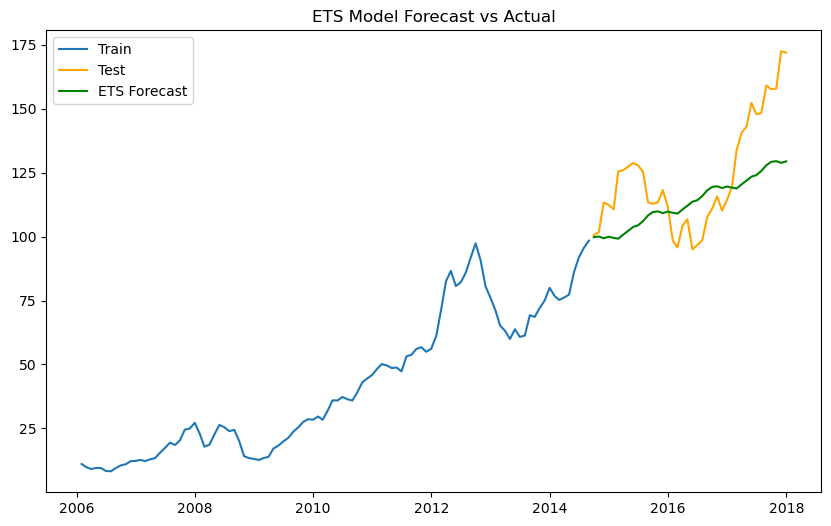

In [90]:
# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color='orange')
plt.plot(test.index, forecast, label="ETS Forecast", color='green')
plt.legend()
plt.title("ETS Model Forecast vs Actual")
plt.show()

Output:
Visual comparison between actual values and ETS forecasts.

Printout of the model's performance (MSE score).



## TBATS

TBATS (Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend and Seasonal components) is ideal for complex seasonal patterns — like multiple or non-integer seasonality.

In [93]:
!pip install tbats

Defaulting to user installation because normal site-packages is not writeable


In [94]:
from tbats import TBATS

In [95]:
# Load and preprocess data (using Brent oil prices as an example)
#import yfinance as yf
#df_brent = yf.download("BZ=F", start="2021-06-01")

# Use closing prices, drop missing
series = df_brent['Close'].dropna()


In [96]:
# Train-test split
train = series[:-40]
test = series[-40:]

In [97]:
# Fit TBATS model
estimator = TBATS(seasonal_periods=[5, 21])  # Example: weekly + monthly seasonality
model = estimator.fit(train)

In [98]:
# Forecast
forecast = model.forecast(steps=len(test))

In [99]:
# Evaluate
mse = mean_squared_error(test, forecast)
print(f'TBATS Model MSE: {mse:.2f}')

TBATS Model MSE: 96.00


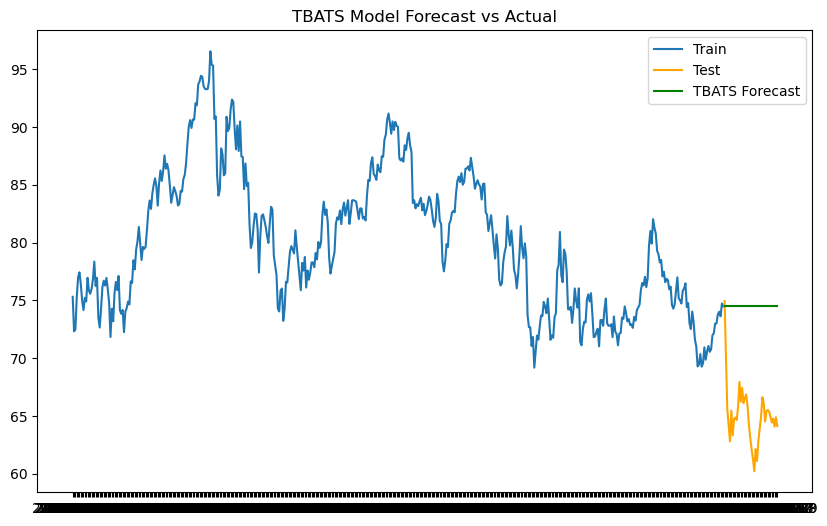

In [100]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='TBATS Forecast', color='green')
plt.legend()
plt.title("TBATS Model Forecast vs Actual")
plt.show()

___

<img src="https://media.giphy.com/media/jsm7XMcyeTFJE4vHzO/giphy.gif">

# References

* [1] -> https://en.wikipedia.org/wiki/Time_series#:~:text=A%20time%20series%20is%20a,sequence%20of%20discrete%2Dtime%20data.
* [2] -> https://cmapskm.ihmc.us/rid=1052458821502_1749267941_6906/components.pdf
* [3] -> https://www.kaggle.com/kashnitsky
* [4] -> https://otexts.com/fpp2/stationarity.html#fn14
* [5] -> https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/
* [6] -> https://people.duke.edu/~rnau/411diff.htm
* [7] -> https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c
* [8] -> https://www.kaggle.com/code/utkukubilay/time-series-analysis-in-python/notebook
* [9] -> https://www.datascienceassn.org/sites/default/files/Review%20of%20automated%20time%20series%20forecasting%20pipelines.pdf
* [10] ->https://github.com/hincaltopcuoglu/
* [11] ->https://www.udemy.com/user/joseportilla/